In [219]:
import uproot
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import sys, os

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm

## Define Function for Invariant Mass

In [220]:
def M(pt1,eta1,phi1,m1,pt2,eta2,phi2,m2):
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    return np.sqrt((e1+e2)**2-(px1+px2)**2-(py1+py2)**2-(pz1+pz2)**2)
    

## Fill particle information in to NumpyArray 

In [221]:
class BrachGenParticles:
    def __init__(self,file):
        self.file = file
        self.length = len(file["Particle.Status"].array())
        self.Status = file["Particle.Status"].array()
        self.PID = file["Particle.PID"].array()
        self.M1 = file["Particle.M1"].array()
        self.M2 = file["Particle.M2"].array()
        self.D1 = file["Particle.D1"].array()
        self.D2  = file["Particle.D2"].array()
        self.PT = file["Particle.PT"].array()
        self.Eta =  file["Particle.Eta"].array()
        self.Phi = file["Particle.Phi"].array()
        self.Mass = file["Particle.Mass"].array()
        self.Labels = ["Status", "PID" , "M1", "M2", "D1", "D2", "PT", "Eta", "Phi", "Mass"]
        
    def Status_At(self, i):
        return self.Status[i]
    def PID_At(self, i):
        return self.PID[i]
    def M1_At(self, i):
        return self.M1[i]
    def M2_At(self, i):
        return self.M2[i]
    def D1_At(self, i):
        return self.D1[i]
    def D2_At(self, i):
        return self.D2[i]
    def PT_At(self, i):
        return self.PT[i]
    def Eta_At(self, i):
        return self.Eta[i]
    def Phi_At(self, i):
        return self.Phi[i]
    def Mass_At(self, i):
        return self.Mass[i]
    
class BrachJet:
    def __init__(self,file):
        self.file = file
        self.length = len(file["Jet.PT"].array())
        self.PT = file["Jet.PT"].array()
        self.Eta =  file["Jet.Eta"].array()
        self.Phi = file["Jet.Phi"].array()
        self.Mass = file["Jet.Mass"].array()
        
    def PT_At(self, i):
        return self.PT[i]
    def Eta_At(self, i):
        return self.Eta[i]
    def Phi_At(self, i):
        return self.Phi[i]
    def Mass_At(self, i):
        return self.Mass[i]
    
class Event_Weight:
    def __init__(self,file):
        self.file = file
        self.length = len(file["Event.Weight"].array())
        self.Event_Weight = np.array(file["Event.Weight"].array())
        
    def Event_Weight_At(self, i):
        return self.Event_Weight[i]

In [222]:
def Check_r_inv(GenParticle):
    invis_count, vis_count = 0, 0
    Ndark = 0
    for i in range(GenParticle.length):
        for j in range(len(GenParticle.Status_At(i))):
            PID = GenParticle.PID_At(i)[j]
            M1 = GenParticle.M1_At(i)[j]
            M2 = GenParticle.M2_At(i)[j]
            D1 = GenParticle.D1_At(i)[j]
            D2 = GenParticle.D2_At(i)[j]
            status = GenParticle.Status_At(i)[j]
            
            if (abs(PID) == 4900111) and (abs( GenParticle.PID_At(i)[D1]) != 4900111) and (abs( GenParticle.PID_At(i)[D2]) != 4900111):
                if (abs(GenParticle.PID_At(i)[D1]) != 3) and (abs( GenParticle.PID_At(i)[D2]) != 3):
                    invis_count += 1

            if (abs(PID) == 4900111) and (abs( GenParticle.PID_At(i)[D1]) != 4900111) and (abs( GenParticle.PID_At(i)[D2]) != 4900111):
                if (abs( GenParticle.PID_At(i)[D1]) == 3) or (abs( GenParticle.PID_At(i)[D2]) == 3):
                    vis_count += 1

            if (abs(PID) == 4900113) and (abs( GenParticle.PID_At(i)[D1]) != 4900113) and (abs( GenParticle.PID_At(i)[D2]) != 4900113):
                if (abs( GenParticle.PID_At(i)[D1]) > 490000) or (abs( GenParticle.PID_At(i)[D2]) > 490000):
                    invis_count += 1

            if (abs(PID) == 4900113) and (abs( GenParticle.PID_At(i)[D1]) != 4900113) and (abs( GenParticle.PID_At(i)[D2]) != 4900113):
                if (abs( GenParticle.PID_At(i)[D1]) < 6) or (abs( GenParticle.PID_At(i)[D2]) < 6):
                    vis_count += 1

            if (abs(PID) == 4900211) and (status == 1):
                    Ndark += 1

            if (abs(PID) == 4900213) and (status == 1):
                    Ndark += 1
                    
        if i == 100:
            break
    
    print("There are {} events.".format(len(GenParticle.Status)))
    print("There are Dark meson {}  decay into invisible particle.".format(invis_count))
    print("There are Dark meson {}  decay into visible particle.".format(vis_count))
    print("r_inv = {:^4.4f} ".format(invis_count/(invis_count+vis_count)))
    
    print("There are {} stable Dark mesons.".format(Ndark))
    print("Average = {:^4.4f} ".format(Ndark/len(GenParticle.Status)))
    
    return invis_count/(invis_count+vis_count), Ndark/len(GenParticle.Status)



def Find_xdxd(GenParticle):
    m_xdxd = []
    for i in range(GenParticle.length):
        for j in range(len(GenParticle.Status_At(i))):
            PID = GenParticle.PID_At(i)[j]
            M1 = GenParticle.M1_At(i)[j]
            M2 = GenParticle.M2_At(i)[j]
            D1 = GenParticle.D1_At(i)[j]
            D2 = GenParticle.D2_At(i)[j]
            status = GenParticle.Status_At(i)[j]
            
            if PID == 4900101:
                tmp_1_pt = GenParticle.PT_At(i)[j]
                tmp_1_eta = GenParticle.Eta_At(i)[j]
                tmp_1_phi = GenParticle.Phi_At(i)[j]
                tmp_1_m = GenParticle.Mass_At(i)[j]
#                 print(tmp_1_pt,tmp_1_eta,tmp_1_phi,tmp_1_m)
                break
                
        for j in range(len(GenParticle.Status_At(i))):
            PID = GenParticle.PID_At(i)[j]
            M1 = GenParticle.M1_At(i)[j]
            M2 = GenParticle.M2_At(i)[j]
            D1 = GenParticle.D1_At(i)[j]
            D2 = GenParticle.D2_At(i)[j]
            status = GenParticle.Status_At(i)[j]
            
            
            if PID == -4900101:
                tmp_2_pt = GenParticle.PT_At(i)[j]
                tmp_2_eta = GenParticle.Eta_At(i)[j]
                tmp_2_phi = GenParticle.Phi_At(i)[j]
                tmp_2_m = GenParticle.Mass_At(i)[j]
#                 print(tmp_2_pt,tmp_2_eta,tmp_2_phi,tmp_2_m)
                break
                
                
        m_xdxd.append(M(tmp_1_pt,tmp_1_eta,tmp_1_phi,tmp_1_m,tmp_2_pt,tmp_2_eta,tmp_2_phi,tmp_2_m))
        
    return np.array(m_xdxd)
    
def Preselection(Jet):
    twojet_invariantmass = []
    survived_list = []
    for i in range(Jet.length):
        if len(Jet.PT_At(i)) < 2:
            continue

        if Jet.PT_At(i)[0] < 440 or Jet.PT_At(i)[1] < 60:
            continue

        if np.abs(Jet.Eta_At(i)[0]- Jet.Eta_At(i)[1]) > 1.2:
            continue

        twojet_invariantmass.append(M(Jet.PT_At(i)[0],Jet.Eta_At(i)[0],Jet.Phi_At(i)[0],Jet.Mass_At(i)[0],
                                      Jet.PT_At(i)[1],Jet.Eta_At(i)[1],Jet.Phi_At(i)[1],Jet.Mass_At(i)[1]))

        survived_list.append(i)

    print("There are {} events.".format(len(twojet_invariantmass)))
    
    return np.array(twojet_invariantmass), np.array(survived_list)

## Import File

In [212]:
# path = "/home/Storage/MG5_Study_Group/ROOT/MJJ_md100"
# path = "/home/Storage/MG5_Study_Group/Cards/MJJ_md10"
path = "/home/Storage/MG5_Study_Group/ROOT/test_10"
# filepath_0_1 = path + "/SVJ_0_1.root"
filepath_0_5 = path + "/SVJ_0_5.root"
# filepath_0_10 = path + "/SVJ_0_10.root"
# filepath_3_1 = path + "/SVJ_3_1.root"
filepath_3_5 = path + "/SVJ_3_5.root"
# filepath_3_10 = path + "/SVJ_3_10.root"

# file_0_1 = uproot.open(filepath_0_1)["Delphes;1"]
file_0_5 = uproot.open(filepath_0_5)["Delphes;1"]
# file_0_10 = uproot.open(filepath_0_10)["Delphes;1"]
# file_3_1 = uproot.open(filepath_3_1)["Delphes;1"]
file_3_5 = uproot.open(filepath_3_5)["Delphes;1"]
# file_3_10 = uproot.open(filepath_3_10)["Delphes;1"]

#  Print the Branch in the Delphes

In [213]:
# file_0_1.show()

In [214]:
# GenParticle_0_1, Jet_0_1, Event_Weight_0_1 = BrachGenParticles(file_0_1), BrachJet(file_0_1), Event_Weight(file_0_1) 
GenParticle_0_5, Jet_0_5, Event_Weight_0_5 = BrachGenParticles(file_0_5), BrachJet(file_0_5), Event_Weight(file_0_5) 
# GenParticle_0_10, Jet_0_10, Event_Weight_0_10 = BrachGenParticles(file_0_10), BrachJet(file_0_10), Event_Weight(file_0_10) 

# GenParticle_3_1, Jet_3_1, Event_Weight_3_1 = BrachGenParticles(file_3_1), BrachJet(file_3_1), Event_Weight(file_3_1) 
GenParticle_3_5, Jet_3_5, Event_Weight_3_5 = BrachGenParticles(file_3_5), BrachJet(file_3_5), Event_Weight(file_3_5) 
# GenParticle_3_10, Jet_3_10, Event_Weight_3_10 = BrachGenParticles(file_3_10), BrachJet(file_3_10), Event_Weight(file_3_10) 


# Check the Event Shape

In [215]:
print(len(GenParticle_0_5.Status))
print(len(GenParticle_3_5.Status))

20000
20000


## Check the $r_{inv}$

In [216]:
# Check_r_inv(GenParticle_3_5)


## Selection

In [217]:
# twojet_invariantmass_0_1, survived_list_0_1 = Preselection(Jet_0_1)
# twojet_invariantmass_3_1, survived_list_3_1 = Preselection(Jet_3_1)
twojet_invariantmass_0_5, survived_list_0_5 = Preselection(Jet_0_5)
twojet_invariantmass_3_5, survived_list_3_5 = Preselection(Jet_3_5)
# twojet_invariantmass_0_10, survived_list_0_10 = Preselection(Jet_0_10)
# twojet_invariantmass_3_10, survived_list_3_10 = Preselection(Jet_3_10)

There are 4072 events.
There are 2383 events.


# $M_d$ = 10 GeV

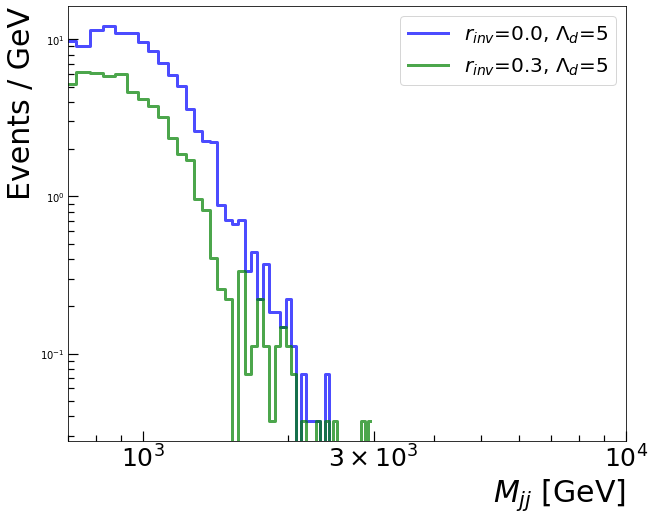

In [218]:
fig, ax = plt.subplots(1,1, figsize=(10,8)) # plotsize

# weight_0_1 = Event_Weight_0_1.Event_Weight[survived_list_0_1]/20000*37*1000/(np.sum(Event_Weight_0_1.Event_Weight)/20000)
# weight_03_1 = Event_Weight_3_1.Event_Weight[survived_list_3_1]/20000*37*1000/(np.sum(Event_Weight_3_1.Event_Weight)/20000)
weight_0_5 = Event_Weight_0_5.Event_Weight[survived_list_0_5]/20000*37*1000/(np.sum(Event_Weight_0_5.Event_Weight)/20000)
weight_03_5 = Event_Weight_3_5.Event_Weight[survived_list_3_5]/20000*37*1000/(np.sum(Event_Weight_3_5.Event_Weight)/20000)
# weight_0_10 = Event_Weight_0_10.Event_Weight[survived_list_0_10]/20000*37*1000/(np.sum(Event_Weight_0_10.Event_Weight)/20000)
# weight_03_10 = Event_Weight_3_10.Event_Weight[survived_list_3_10]/20000*37*1000/(np.sum(Event_Weight_3_10.Event_Weight)/20000)

bin_size = np.linspace(0,3000,61)


# hist_0, bins_0 = np.histogram(twojet_invariantmass_0_1, bins=bin_size, weights = weight_0_1)
# ax.step(bins_0[:-1], hist_0.astype(np.float32)/50, color = "c", where='mid',linewidth=3, alpha=0.7,label="$r_{inv}$=0.0, $\Lambda_d$=1") 

# hist_03, bins_03 = np.histogram(twojet_invariantmass_3_1, bins=bin_size, weights = weight_03_1)
# ax.step(bins_03[:-1], hist_03.astype(np.float32)/50, color = "red", where='mid',linewidth=3, alpha=0.7,label="$r_{inv}$=0.3, $\Lambda_d$=1") 


hist_0, bins_0 = np.histogram(twojet_invariantmass_0_5, bins=bin_size, weights = weight_0_5)
ax.step(bins_0[:-1], hist_0.astype(np.float32)/50, color = "blue", where='mid',linewidth=3, alpha=0.7,label="$r_{inv}$=0.0, $\Lambda_d$=5") 

hist_03, bins_03 = np.histogram(twojet_invariantmass_3_5, bins=bin_size, weights = weight_03_5)
ax.step(bins_03[:-1], hist_03.astype(np.float32)/50, color = "green", where='mid',linewidth=3, alpha=0.7,label="$r_{inv}$=0.3, $\Lambda_d$=5") 


# hist_0, bins_0 = np.histogram(twojet_invariantmass_0_10, bins=bin_size, weights = weight_0_10)
# ax.step(bins_0[:-1], hist_0.astype(np.float32)/50, color = "purple", where='mid',linewidth=3, alpha=0.7,label="$r_{inv}$=0.0, $\Lambda_d$=10") 

# hist_03, bins_03 = np.histogram(twojet_invariantmass_3_10, bins=bin_size, weights = weight_03_10)
# ax.step(bins_03[:-1], hist_03.astype(np.float32)/50, color = "orange", where='mid',linewidth=3, alpha=0.7,label="$r_{inv}$=0.3, $\Lambda_d$=10") 


plt.yscale('log') 
plt.xscale('log') 
# plt.yticks([1,100,10000],["$10^0$","$10^2$","$10^4$"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="right")

plt.xticks([1E+3,3E+3,1E+4],["$10^3$","$3\\times10^3$","$10^4$"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="center")

plt.tick_params(axis='x',which='minor', length=6, color='k', direction="in", width = 1.2)
plt.tick_params(axis='x',which='major', length=10, color='k', direction="in", width = 1.2)
plt.tick_params(axis='y',which='minor', length=6, color='k', direction="in", width = 1.2)
plt.tick_params(axis='y',which='major', length=10, color='k', direction="in", width = 1.2)


plt.xlim((700,10000))
plt.xlabel("$M_{jj}$ [GeV]" , fontsize=30, horizontalalignment='right',x=1)  # plot x-axis label
# plt.ylabel("d$\sigma$/d$M_{jj}$ [pb]", fontsize=30, horizontalalignment='right',y=1)  # plot y-axis label
plt.ylabel("Events / GeV", fontsize=30, horizontalalignment='right',y=1)  # plot y-axis label
# plt.xticks(fontsize=15)   # set x-ticks size
# plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=20) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

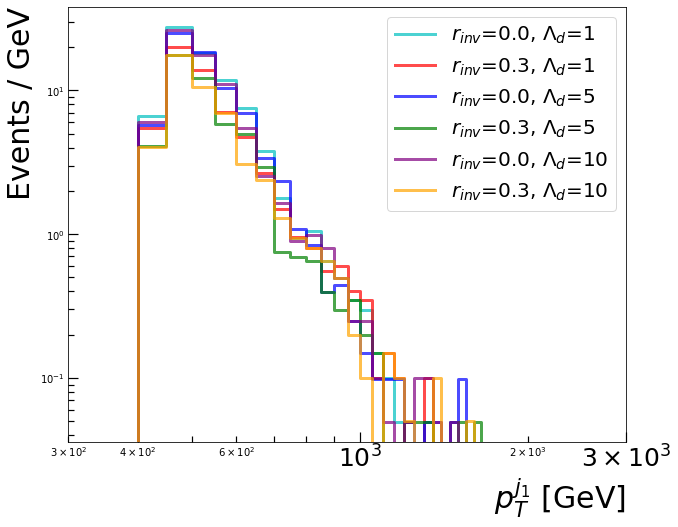

In [179]:
fig, ax = plt.subplots(1,1, figsize=(10,8)) # plotsize

weight_0_1 = Event_Weight_0_1.Event_Weight[survived_list_0_1]/20000*37*1000/(np.sum(Event_Weight_0_1.Event_Weight)/20000)
weight_03_1 = Event_Weight_3_1.Event_Weight[survived_list_3_1]/20000*37*1000/(np.sum(Event_Weight_3_1.Event_Weight)/20000)
weight_0_5 = Event_Weight_0_5.Event_Weight[survived_list_0_5]/20000*37*1000/(np.sum(Event_Weight_0_5.Event_Weight)/20000)
weight_03_5 = Event_Weight_3_5.Event_Weight[survived_list_3_5]/20000*37*1000/(np.sum(Event_Weight_3_5.Event_Weight)/20000)
weight_0_10 = Event_Weight_0_10.Event_Weight[survived_list_0_10]/20000*37*1000/(np.sum(Event_Weight_0_10.Event_Weight)/20000)
weight_03_10 = Event_Weight_3_10.Event_Weight[survived_list_3_10]/20000*37*1000/(np.sum(Event_Weight_3_10.Event_Weight)/20000)

bin_size = np.linspace(0,3000,61)


hist_0, bins_0 = np.histogram(Jet_0_1.PT[survived_list_0_1,0], bins=bin_size, weights = weight_0_1)
ax.step(bins_0[:-1], hist_0.astype(np.float32)/50, color = "c", where='post',linewidth=3, alpha=0.7,label="$r_{inv}$=0.0, $\Lambda_d$=1") 

hist_03, bins_03 = np.histogram(Jet_3_1.PT[survived_list_3_1,0], bins=bin_size, weights = weight_03_1)
ax.step(bins_03[:-1], hist_03.astype(np.float32)/50, color = "red", where='post',linewidth=3, alpha=0.7,label="$r_{inv}$=0.3, $\Lambda_d$=1") 


hist_0, bins_0 = np.histogram(Jet_0_5.PT[survived_list_0_5,0], bins=bin_size, weights = weight_0_5)
ax.step(bins_0[:-1], hist_0.astype(np.float32)/50, color = "blue", where='post',linewidth=3, alpha=0.7,label="$r_{inv}$=0.0, $\Lambda_d$=5") 

hist_03, bins_03 = np.histogram(Jet_3_5.PT[survived_list_3_5,0], bins=bin_size, weights = weight_03_5)
ax.step(bins_03[:-1], hist_03.astype(np.float32)/50, color = "green", where='post',linewidth=3, alpha=0.7,label="$r_{inv}$=0.3, $\Lambda_d$=5") 


hist_0, bins_0 = np.histogram(Jet_0_10.PT[survived_list_0_10,0], bins=bin_size, weights = weight_0_10)
ax.step(bins_0[:-1], hist_0.astype(np.float32)/50, color = "purple", where='post',linewidth=3, alpha=0.7,label="$r_{inv}$=0.0, $\Lambda_d$=10") 

hist_03, bins_03 = np.histogram(Jet_3_10.PT[survived_list_3_10,0], bins=bin_size, weights = weight_03_10)
ax.step(bins_03[:-1], hist_03.astype(np.float32)/50, color = "orange", where='post',linewidth=3, alpha=0.7,label="$r_{inv}$=0.3, $\Lambda_d$=10") 


plt.yscale('log') 
plt.xscale('log') 
# plt.yticks([1,100,10000],["$10^0$","$10^2$","$10^4$"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="right")

plt.xticks([1E+3,3E+3,1E+4],["$10^3$","$3\\times10^3$","$10^4$"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="center")

plt.tick_params(axis='x',which='minor', length=6, color='k', direction="in", width = 1.2)
plt.tick_params(axis='x',which='major', length=10, color='k', direction="in", width = 1.2)
plt.tick_params(axis='y',which='minor', length=6, color='k', direction="in", width = 1.2)
plt.tick_params(axis='y',which='major', length=10, color='k', direction="in", width = 1.2)


plt.xlim((300,3000))
plt.xlabel("$p^{j_1}_T$ [GeV]" , fontsize=30, horizontalalignment='right',x=1)  # plot x-axis label
# plt.ylabel("d$\sigma$/d$M_{jj}$ [pb]", fontsize=30, horizontalalignment='right',y=1)  # plot y-axis label
plt.ylabel("Events / GeV", fontsize=30, horizontalalignment='right',y=1)  # plot y-axis label
# plt.xticks(fontsize=15)   # set x-ticks size
# plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=20) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

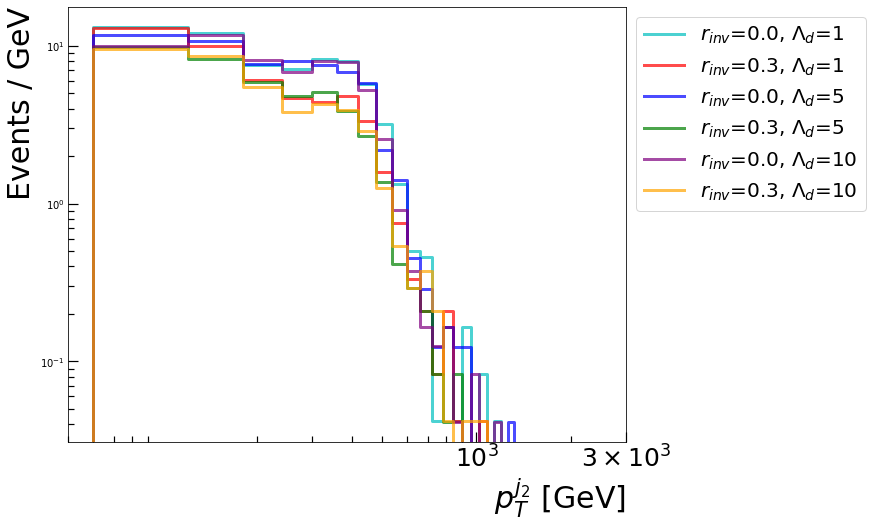

In [180]:
fig, ax = plt.subplots(1,1, figsize=(10,8)) # plotsize

weight_0_1 = Event_Weight_0_1.Event_Weight[survived_list_0_1]/20000*37*1000/(np.sum(Event_Weight_0_1.Event_Weight)/20000)
weight_03_1 = Event_Weight_3_1.Event_Weight[survived_list_3_1]/20000*37*1000/(np.sum(Event_Weight_3_1.Event_Weight)/20000)
weight_0_5 = Event_Weight_0_5.Event_Weight[survived_list_0_5]/20000*37*1000/(np.sum(Event_Weight_0_5.Event_Weight)/20000)
weight_03_5 = Event_Weight_3_5.Event_Weight[survived_list_3_5]/20000*37*1000/(np.sum(Event_Weight_3_5.Event_Weight)/20000)
weight_0_10 = Event_Weight_0_10.Event_Weight[survived_list_0_10]/20000*37*1000/(np.sum(Event_Weight_0_10.Event_Weight)/20000)
weight_03_10 = Event_Weight_3_10.Event_Weight[survived_list_3_10]/20000*37*1000/(np.sum(Event_Weight_3_10.Event_Weight)/20000)

bin_size = np.linspace(0,3000,51)


hist_0, bins_0 = np.histogram(Jet_0_1.PT[survived_list_0_1,1], bins=bin_size, weights = weight_0_1)
ax.step(bins_0[:-1], hist_0.astype(np.float32)/60, color = "c", where='post',linewidth=3, alpha=0.7,label="$r_{inv}$=0.0, $\Lambda_d$=1") 

hist_03, bins_03 = np.histogram(Jet_3_1.PT[survived_list_3_1,1], bins=bin_size, weights = weight_03_1)
ax.step(bins_03[:-1], hist_03.astype(np.float32)/60, color = "red", where='post',linewidth=3, alpha=0.7,label="$r_{inv}$=0.3, $\Lambda_d$=1") 


hist_0, bins_0 = np.histogram(Jet_0_5.PT[survived_list_0_5,1], bins=bin_size, weights = weight_0_5)
ax.step(bins_0[:-1], hist_0.astype(np.float32)/60, color = "blue", where='post',linewidth=3, alpha=0.7,label="$r_{inv}$=0.0, $\Lambda_d$=5") 

hist_03, bins_03 = np.histogram(Jet_3_5.PT[survived_list_3_5,1], bins=bin_size, weights = weight_03_5)
ax.step(bins_03[:-1], hist_03.astype(np.float32)/60, color = "green", where='post',linewidth=3, alpha=0.7,label="$r_{inv}$=0.3, $\Lambda_d$=5") 


hist_0, bins_0 = np.histogram(Jet_0_10.PT[survived_list_0_10,1], bins=bin_size, weights = weight_0_10)
ax.step(bins_0[:-1], hist_0.astype(np.float32)/60, color = "purple", where='post',linewidth=3, alpha=0.7,label="$r_{inv}$=0.0, $\Lambda_d$=10") 

hist_03, bins_03 = np.histogram(Jet_3_10.PT[survived_list_3_10,1], bins=bin_size, weights = weight_03_10)
ax.step(bins_03[:-1], hist_03.astype(np.float32)/60, color = "orange", where='post',linewidth=3, alpha=0.7,label="$r_{inv}$=0.3, $\Lambda_d$=10") 


plt.yscale('log') 
plt.xscale('log') 
# plt.yticks([1,100,10000],["$10^0$","$10^2$","$10^4$"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="right")

plt.xticks([1E+3,3E+3,1E+4],["$10^3$","$3\\times10^3$","$10^4$"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="center")

plt.tick_params(axis='x',which='minor', length=6, color='k', direction="in", width = 1.2)
plt.tick_params(axis='x',which='major', length=10, color='k', direction="in", width = 1.2)
plt.tick_params(axis='y',which='minor', length=6, color='k', direction="in", width = 1.2)
plt.tick_params(axis='y',which='major', length=10, color='k', direction="in", width = 1.2)


plt.xlim((50,3000))
plt.xlabel("$p^{j_2}_T$ [GeV]" , fontsize=30, horizontalalignment='right',x=1)  # plot x-axis label
# plt.ylabel("d$\sigma$/d$M_{jj}$ [pb]", fontsize=30, horizontalalignment='right',y=1)  # plot y-axis label
plt.ylabel("Events / GeV", fontsize=30, horizontalalignment='right',y=1)  # plot y-axis label
# plt.xticks(fontsize=15)   # set x-ticks size
# plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=20) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

# Print the Truth Record in an Event

In [ ]:
GenParticle = GenParticle_3_10
print("There are {} information in this event.".format(len(GenParticle.Status)))
print("GenParticle Information")
print("{:^5}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^8}{:^8}{:^8}{:^8}".format("#","Status","PID", "M1", "M2", "D1", "D2", "PT", "Eta","Phi", "Mass"))

index = 0 ## which event you want to print out

for j in range(len(GenParticle.Status_At(index))):
    print("{:^5}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^8.5}{:^8.5}{:^8.5}{:^8.5}".format( \
        j, GenParticle.Status_At(index)[j],  GenParticle.PID_At(index)[j], GenParticle.M1_At(index)[j], GenParticle.M2_At(index)[j],
         GenParticle.D1_At(index)[j], GenParticle.D2_At(index)[j],  GenParticle.PT_At(index)[j],  GenParticle.Eta_At(index)[j], GenParticle.Phi_At(index)[j], GenParticle.Mass_At(index)[j]))



In [165]:
m_dxdx = Find_xdxd(GenParticle_3_10)

total events: 15293 


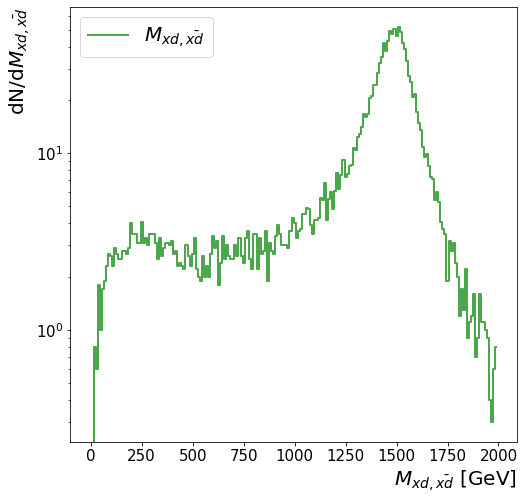

In [168]:
plt.figure(figsize=(8,8)) # plotsize

print("total events: {} ".format(len(m_dxdx)))

bin_size = np.linspace(0,2000,201)
hist, bins = np.histogram(m_dxdx, bins=bin_size)
plt.step(bins[:-1], hist.astype(np.float32)/10,color = "green", where='mid',linewidth=2, alpha=0.7,label="$M_{xd,\\bar{xd}}$") 

# plt.legend(bbox_to_anchor=(1, 1),ncol=2,fontsize=20)
plt.legend(ncol=2,fontsize=20)# plot label tag
plt.yscale('log') 
plt.xlabel("$M_{xd,\\bar{xd}}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("dN/d$M_{xd,\\bar{xd}}$", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

In [167]:
aaa = [1,5,10,50,100,150,200,250,300,350]
# print(aaa)
for i, lambda_d in enumerate(aaa):
    print("lambda: {:^7.3f}  alpha:{:^7.3f}".format(aaa[i],np.pi*2/((11./3.*2-2./3.*2)*np.log(1000./lambda_d))))


lambda:  1.000   alpha: 0.152 
lambda:  5.000   alpha: 0.198 
lambda: 10.000   alpha: 0.227 
lambda: 50.000   alpha: 0.350 
lambda: 100.000  alpha: 0.455 
lambda: 150.000  alpha: 0.552 
lambda: 200.000  alpha: 0.651 
lambda: 250.000  alpha: 0.755 
lambda: 300.000  alpha: 0.870 
lambda: 350.000  alpha: 0.997 
